Topology-incast-singlenode-large-number-8.tcl

8 host each edge

200 flow num

40Gbps Bottleneck

100Gbps other_link_rate

1us delay

In [18]:
import JupyterImport
from FCT import *
from shortTh import *
from delay import *
from QueueLen import *

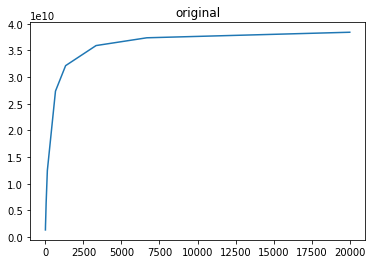

In [19]:
flow_size=[0, 6, 13, 19, 33, 53, 133, 667, 1333, 3333, 6667, 20000, float('inf')]

normalize_lists = loadNormalizeList('/home/pg_ga/lining/Gearbox/automatic/flowBenchmark/', flow_size[1:-1])
plt.plot(normalize_lists[0], normalize_lists[1])
plt.title("original")
plt.show()

In [20]:
FCT_analysis_normalize = FCT("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)

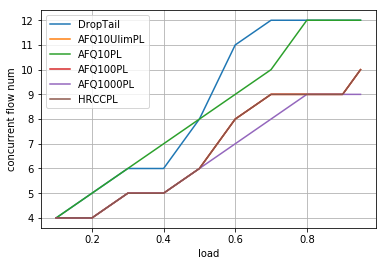

In [4]:
algs=["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"]
loads=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95]
FCT_analysis_normalize.overlap_num(algs, loads)

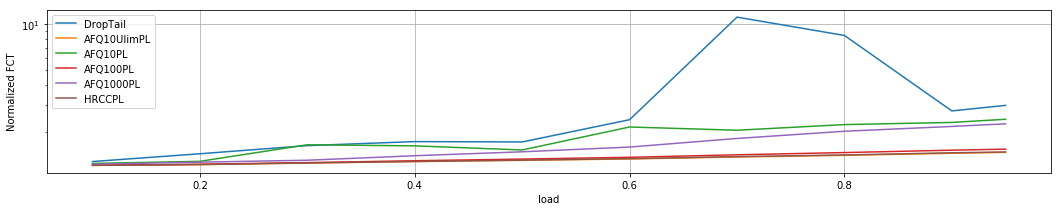

In [5]:
FCT_analysis_normalize.plotting_mean_FCT()

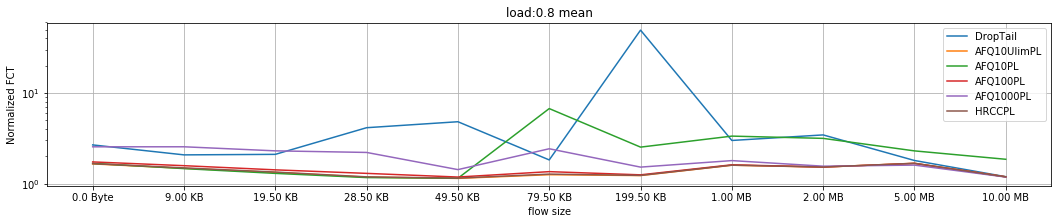

In [22]:
FCT_analysis_normalize.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.8, flow_size)

## DropTail

In [7]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "DropTail_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")

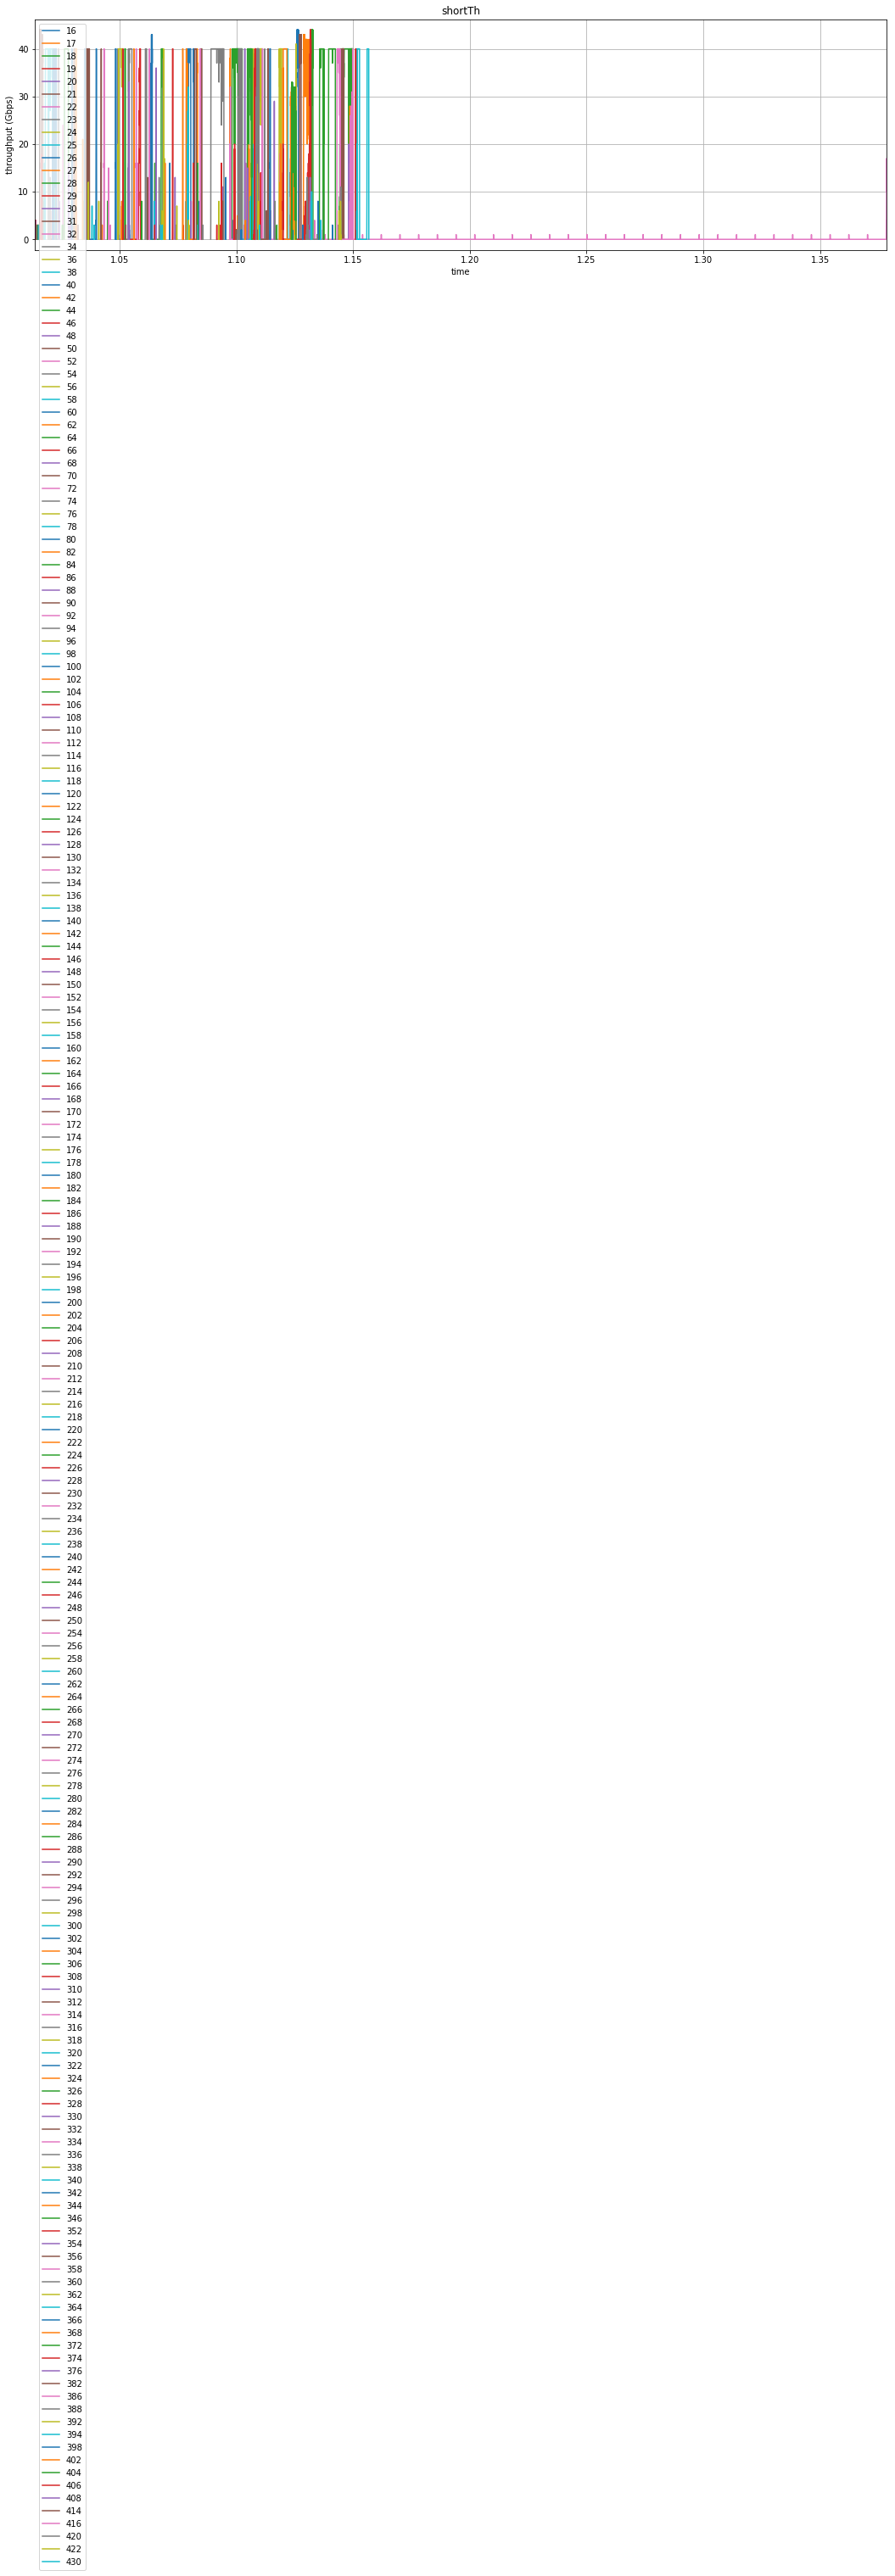

In [8]:
plot_short_th(df_out_tr_6, 12, 83)

from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


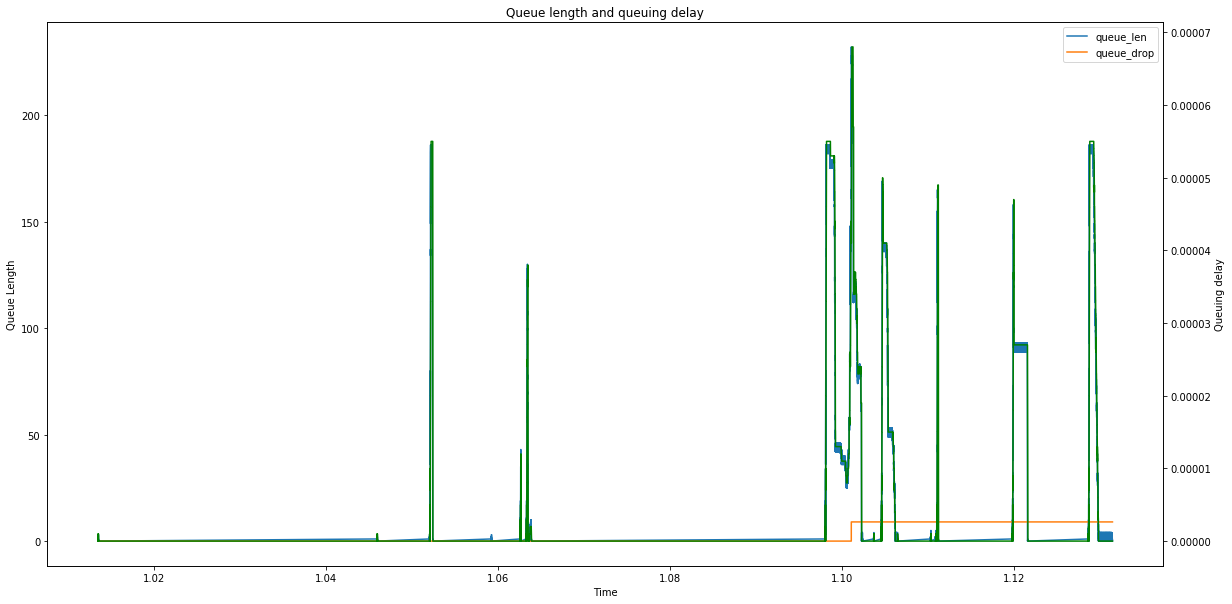

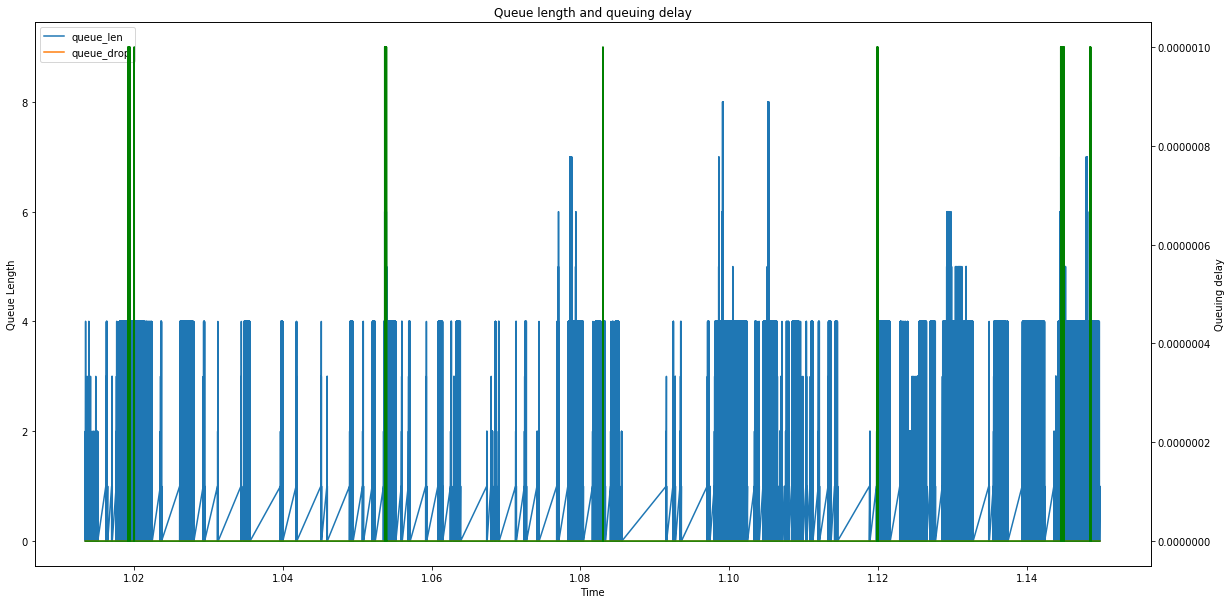

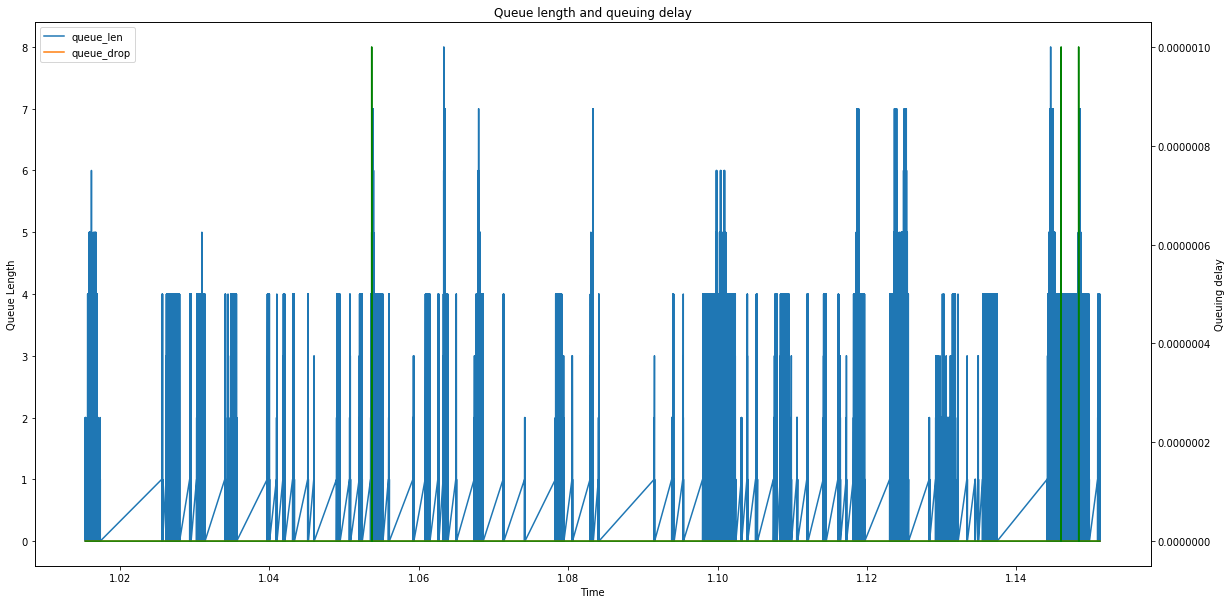

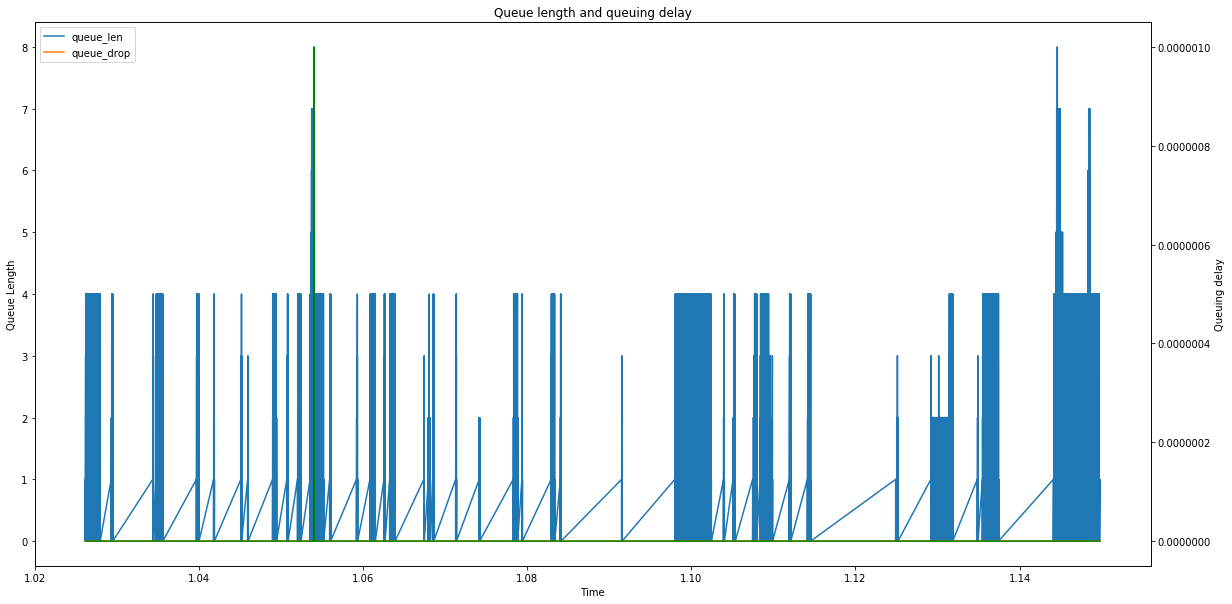

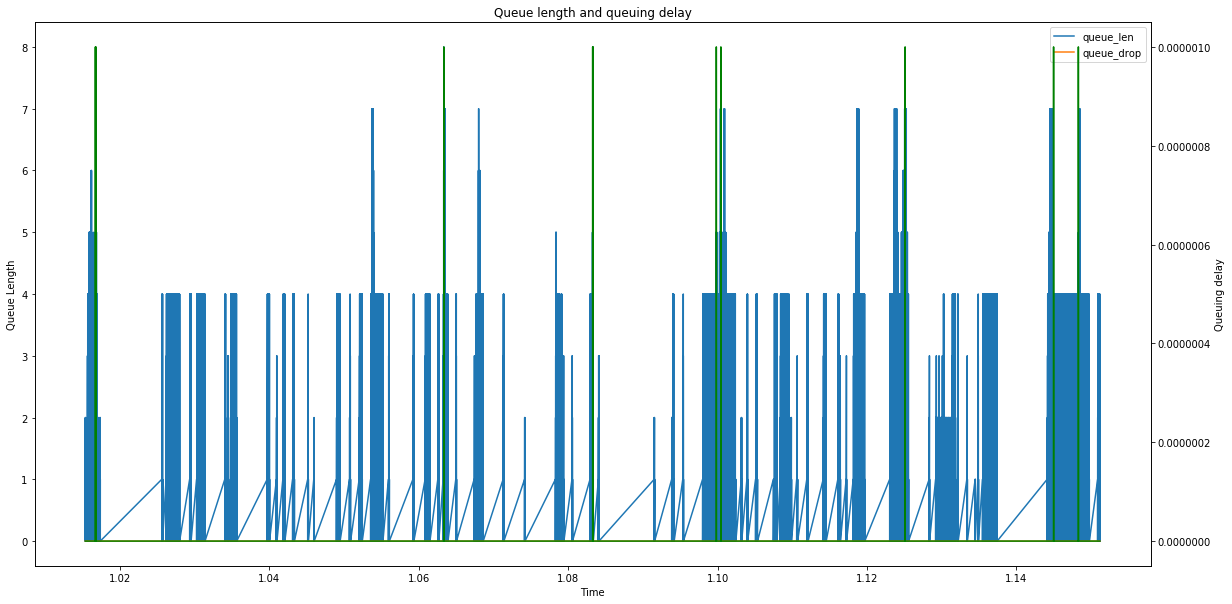

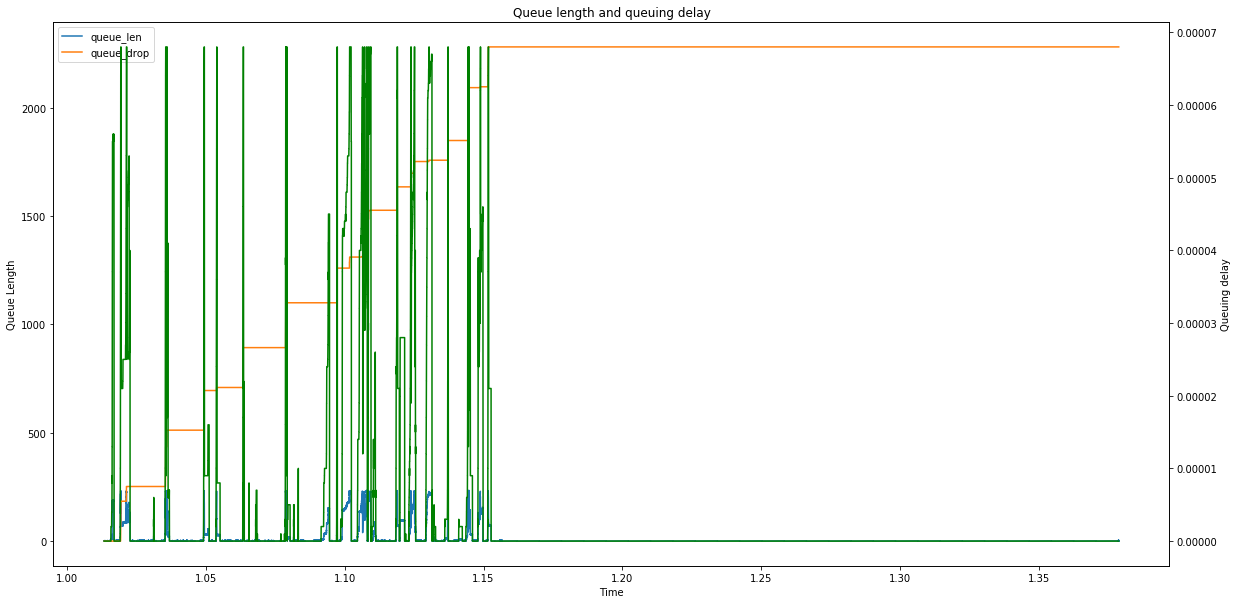

In [9]:
plot_flow_path_queue_length(df_out_tr_6, 180)

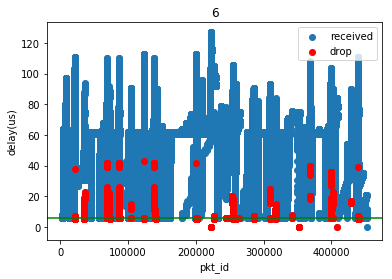

In [10]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                        "DropTail_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

## AFQ10UlimPL

In [11]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "AFQ10UlimPL_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")

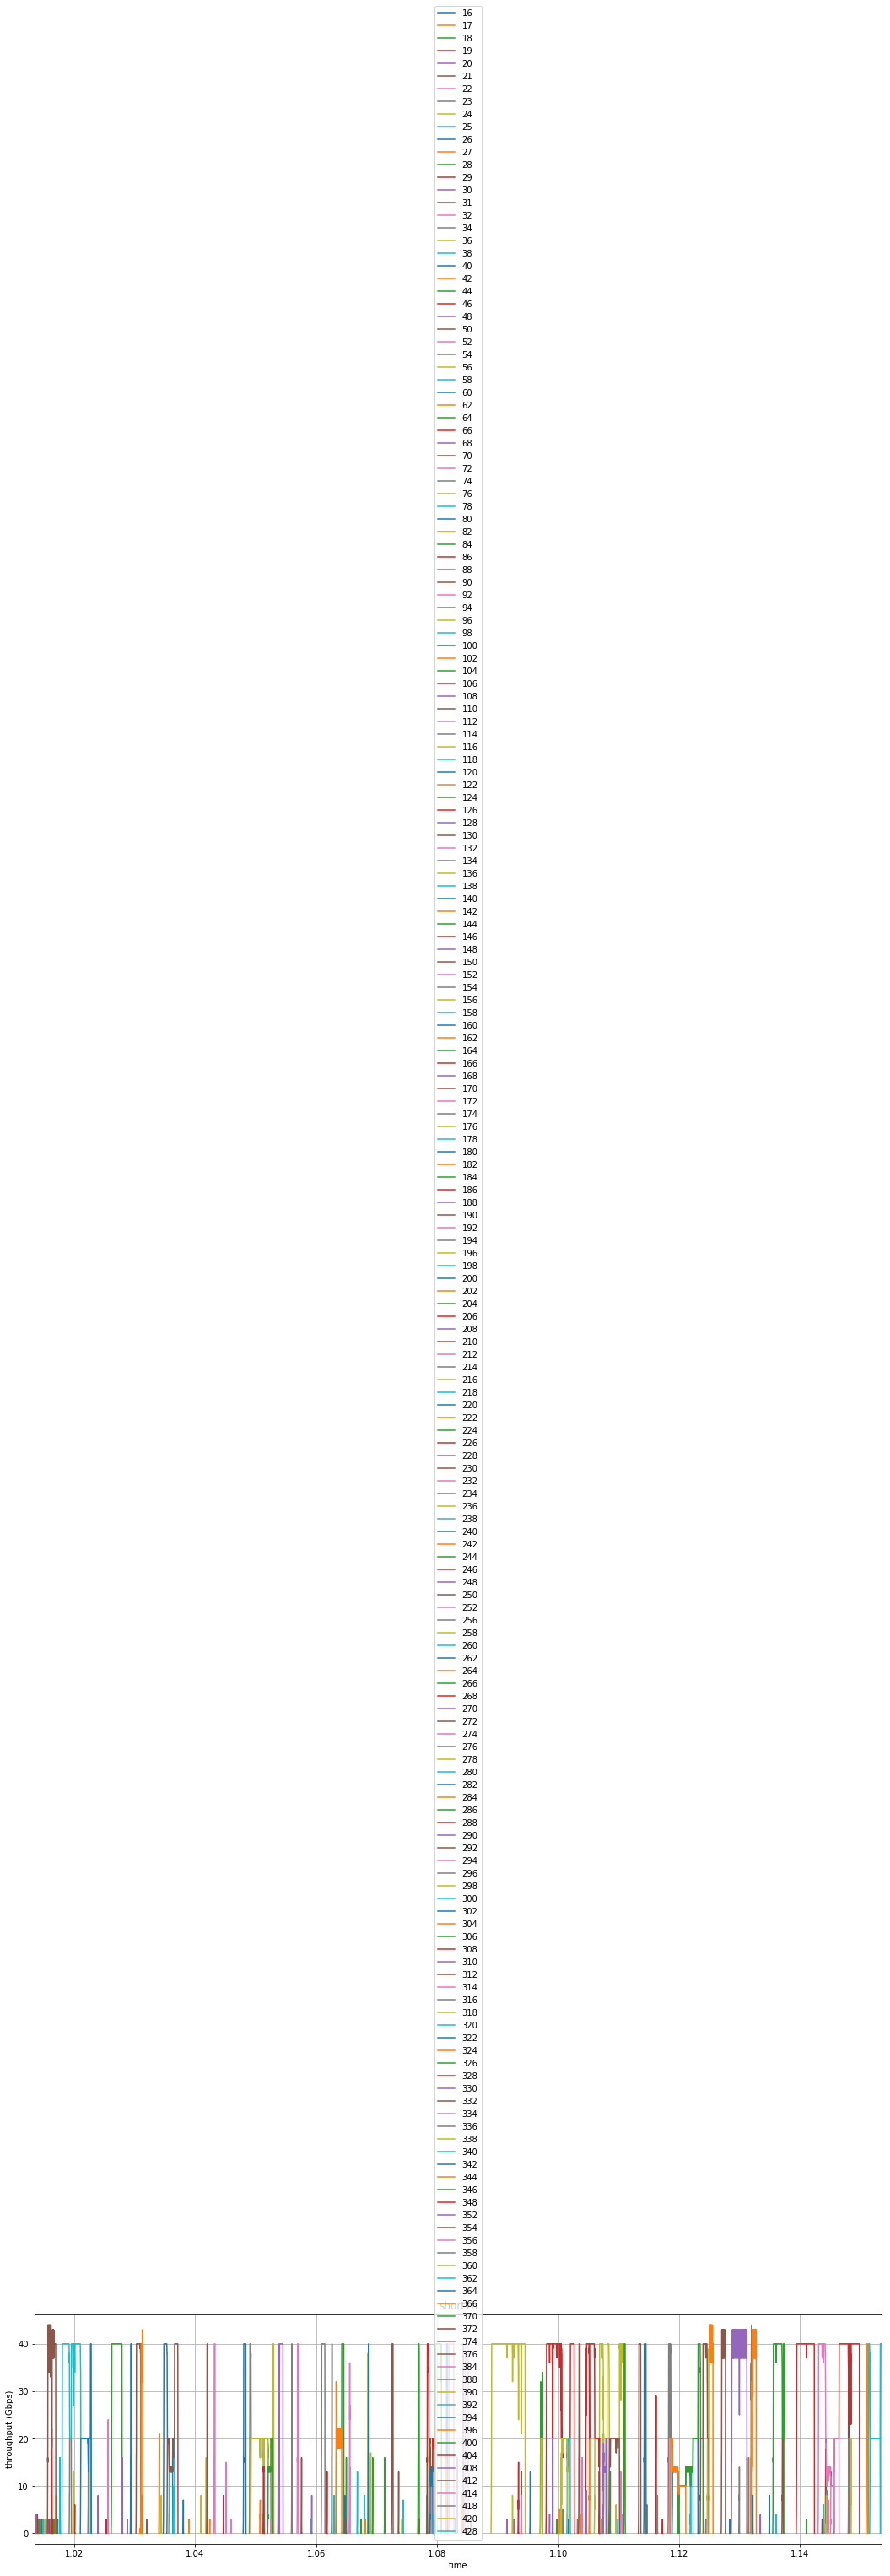

from [27 12  1 11  7 19]
to [12  1 11  7 19 83]


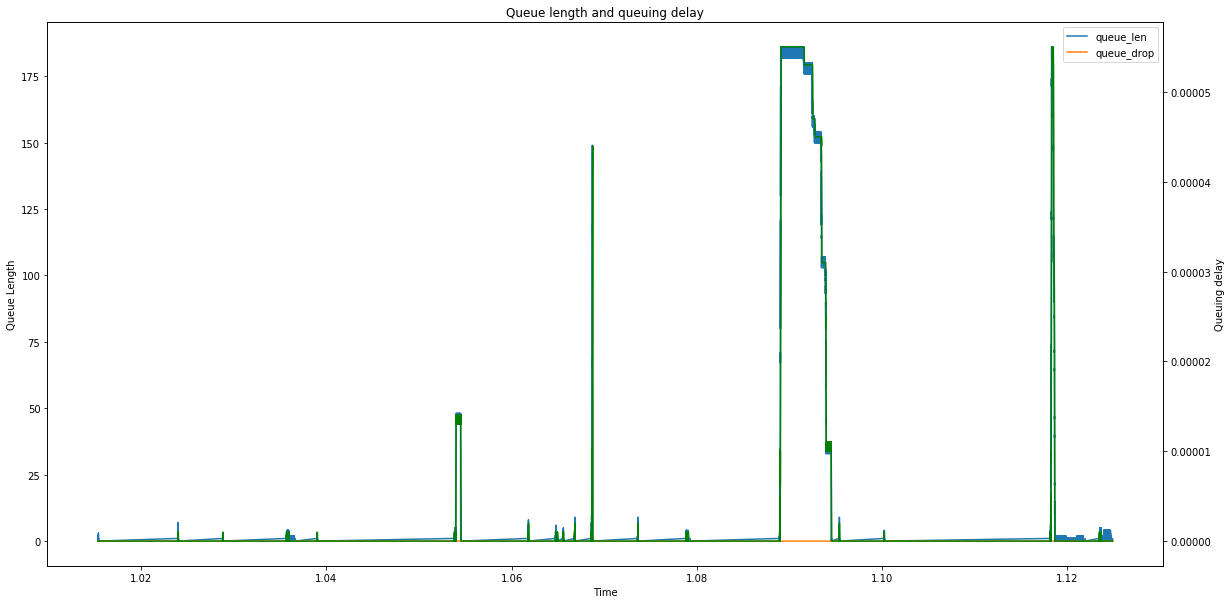

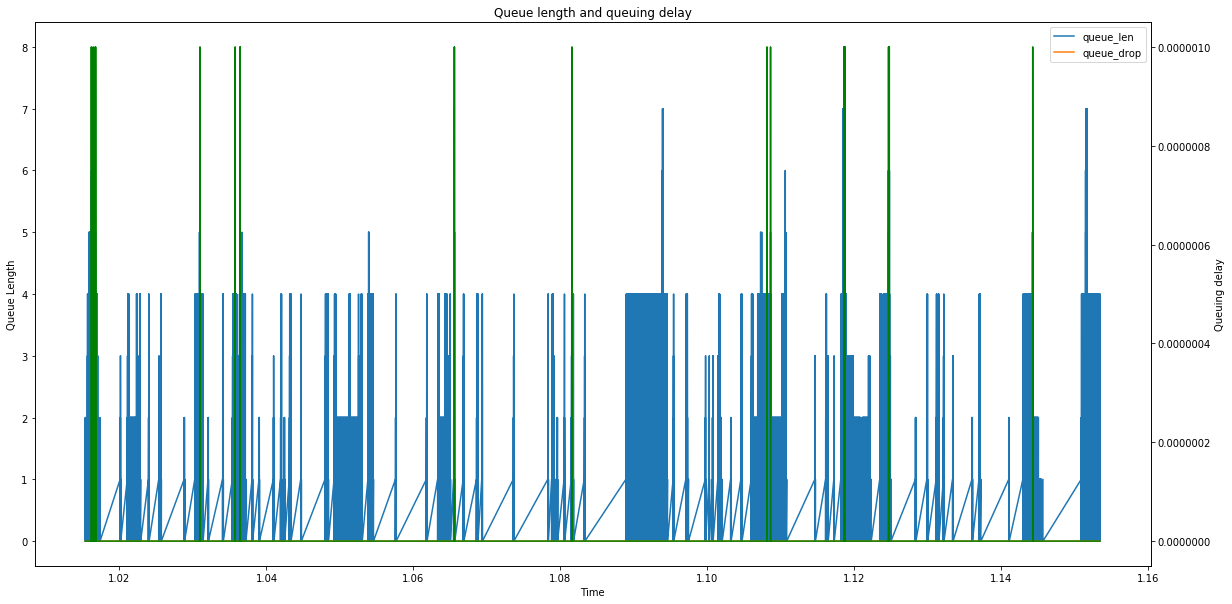

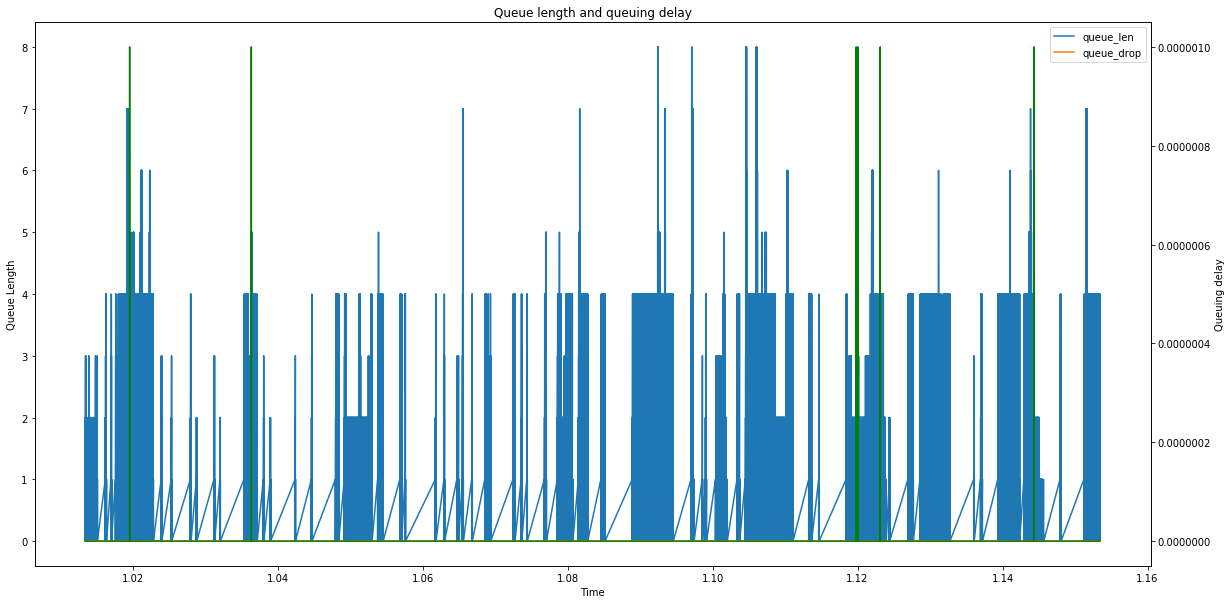

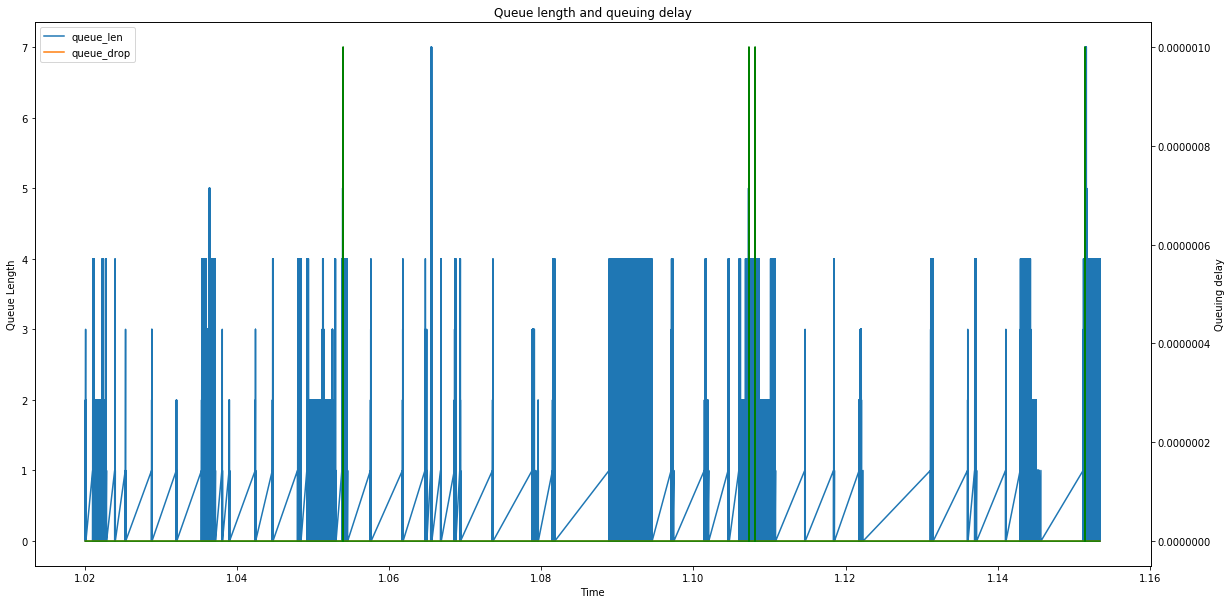

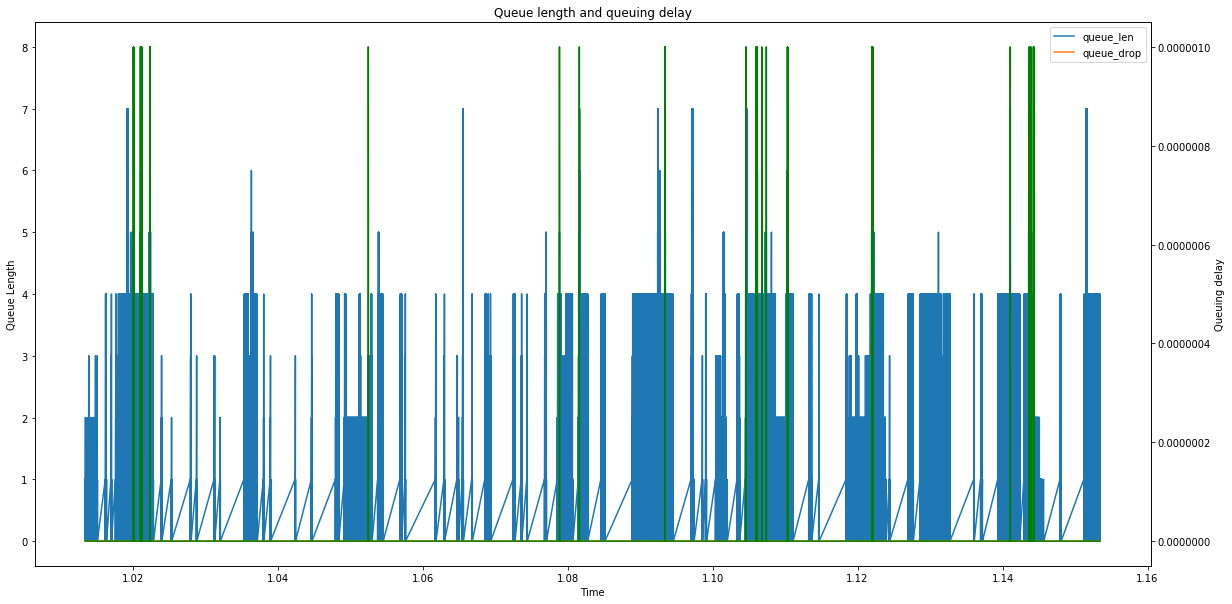

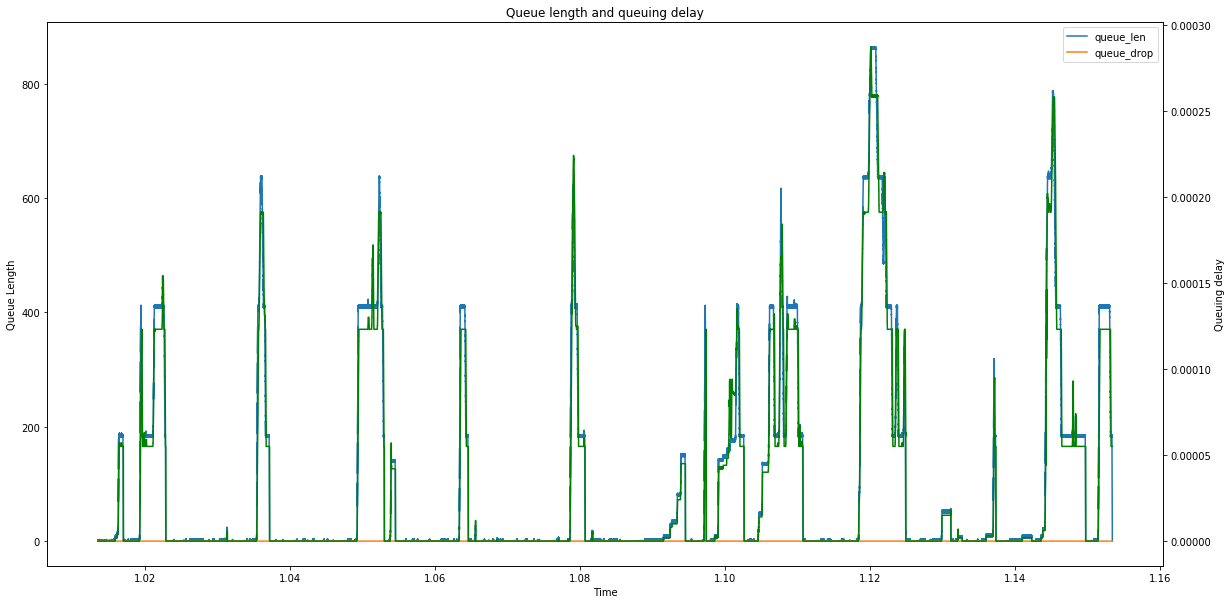

In [12]:
plot_short_th(df_out_tr_6, 12, 83)
plot_flow_path_queue_length(df_out_tr_6, 180)

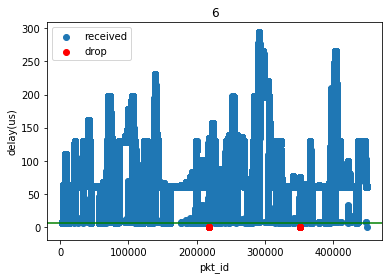

In [13]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                        "AFQ10UlimPL_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

## HRCCPL

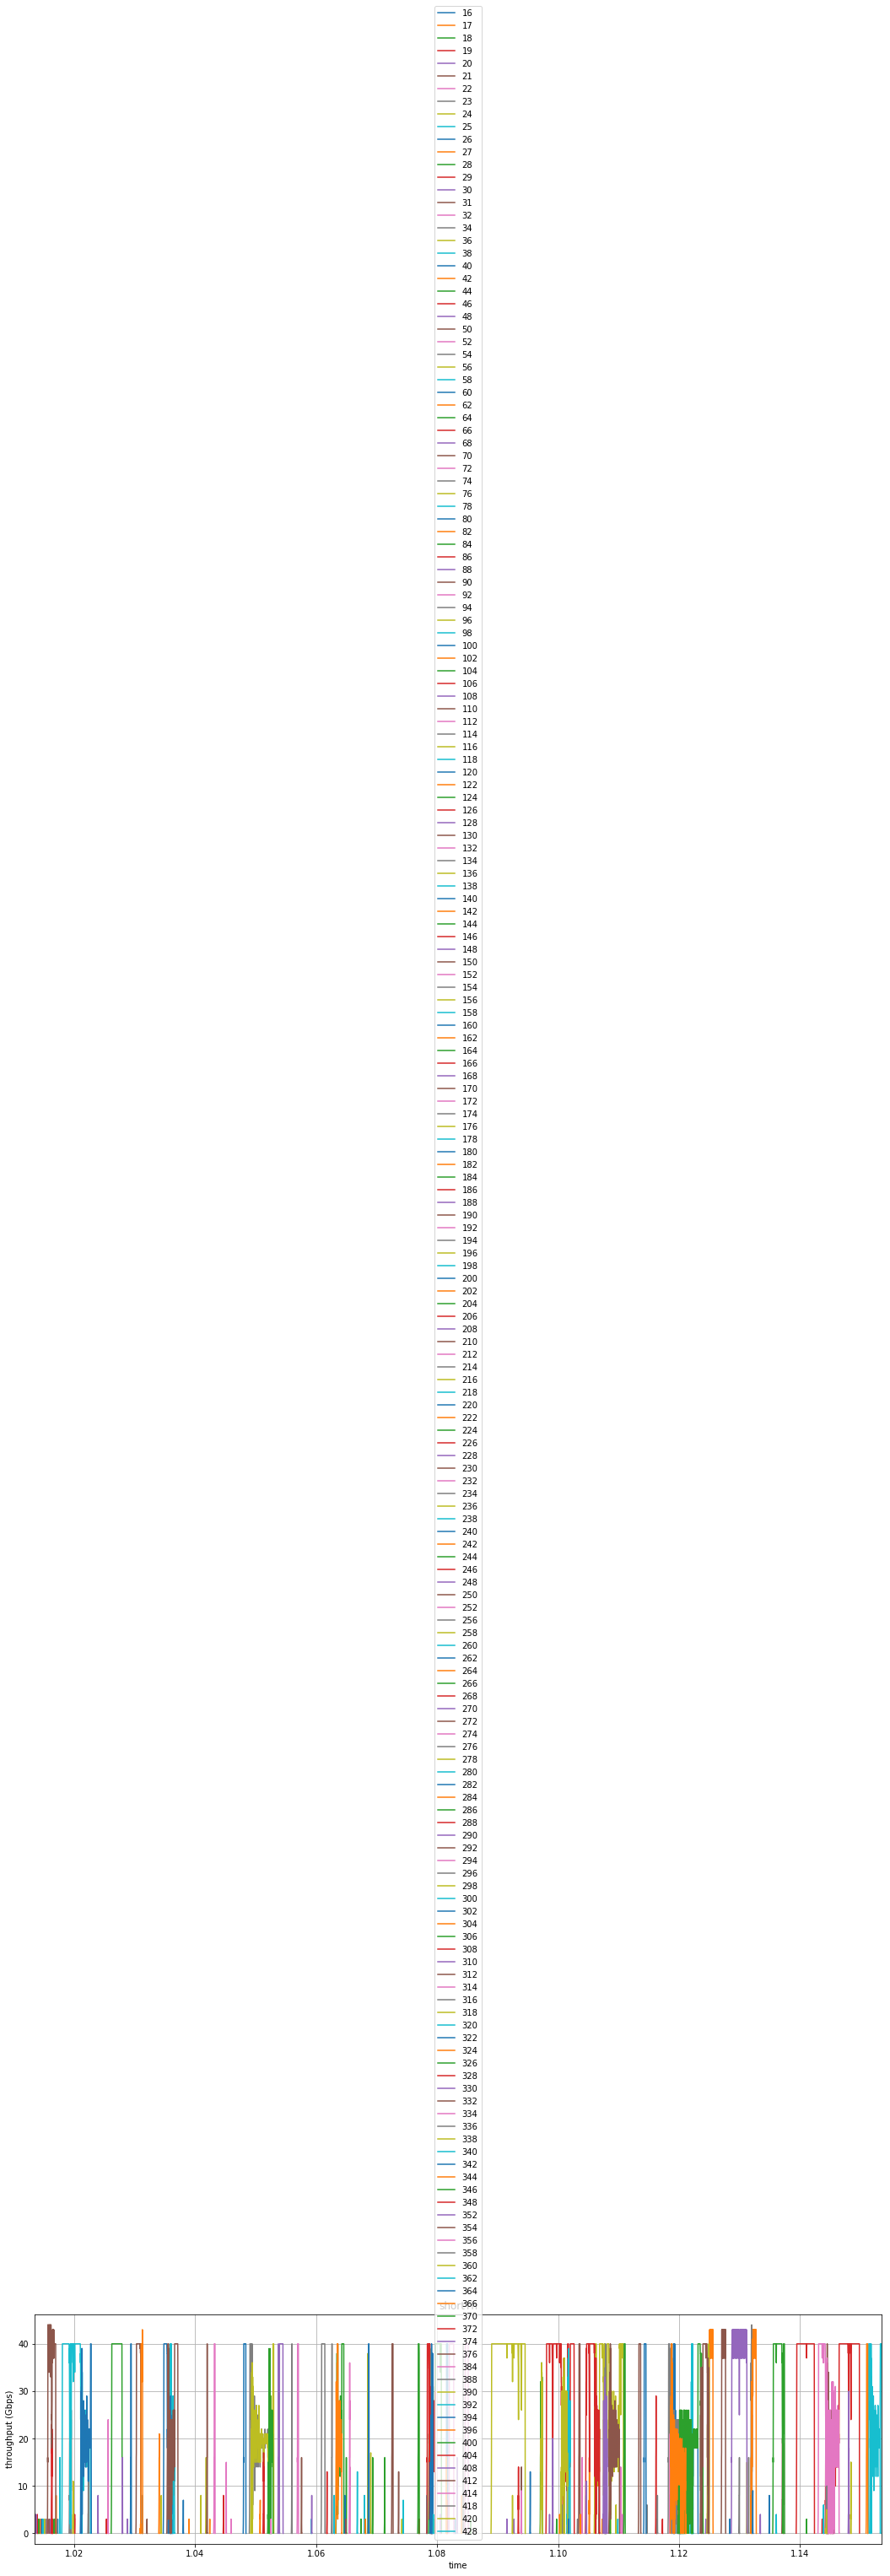

from [27 12  1 11  7 19]
to [12  1 11  7 19 83]


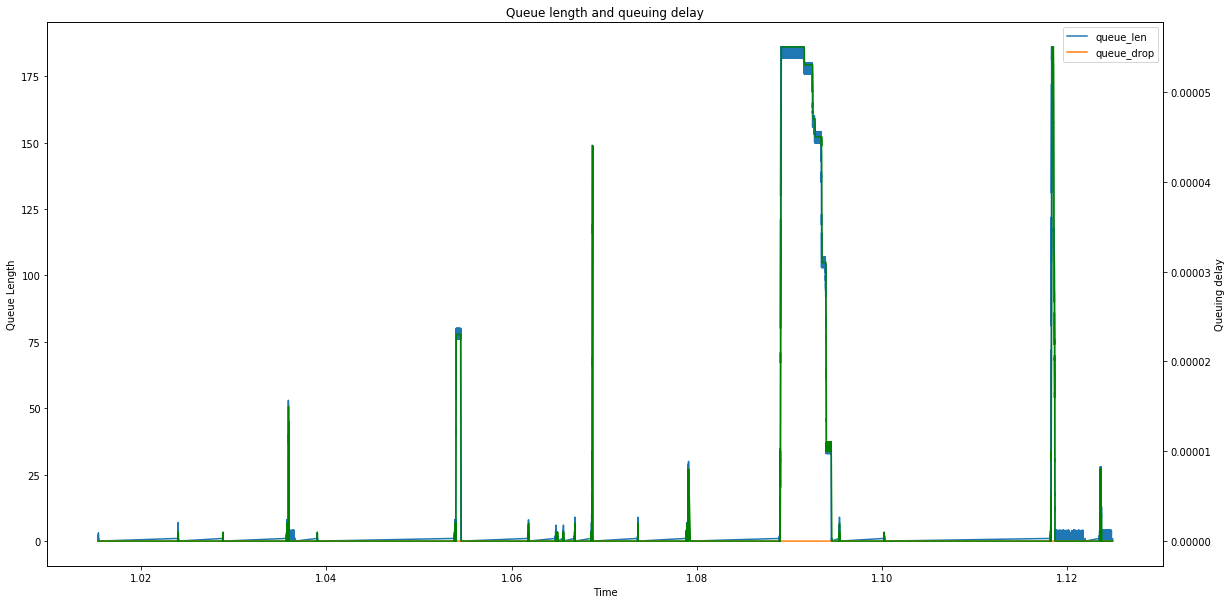

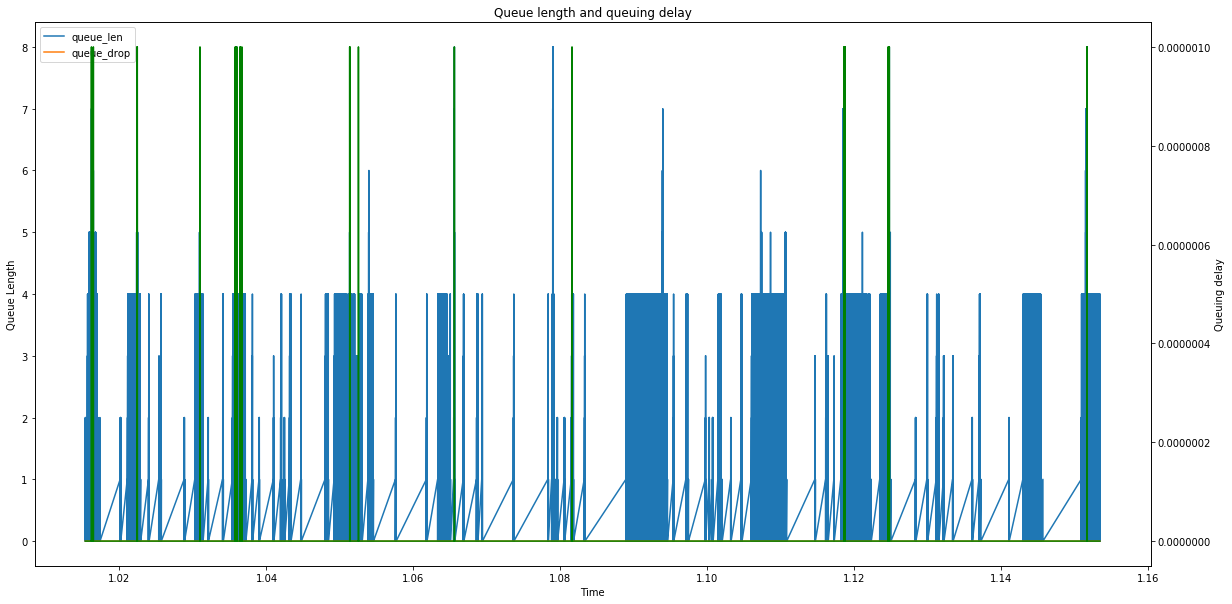

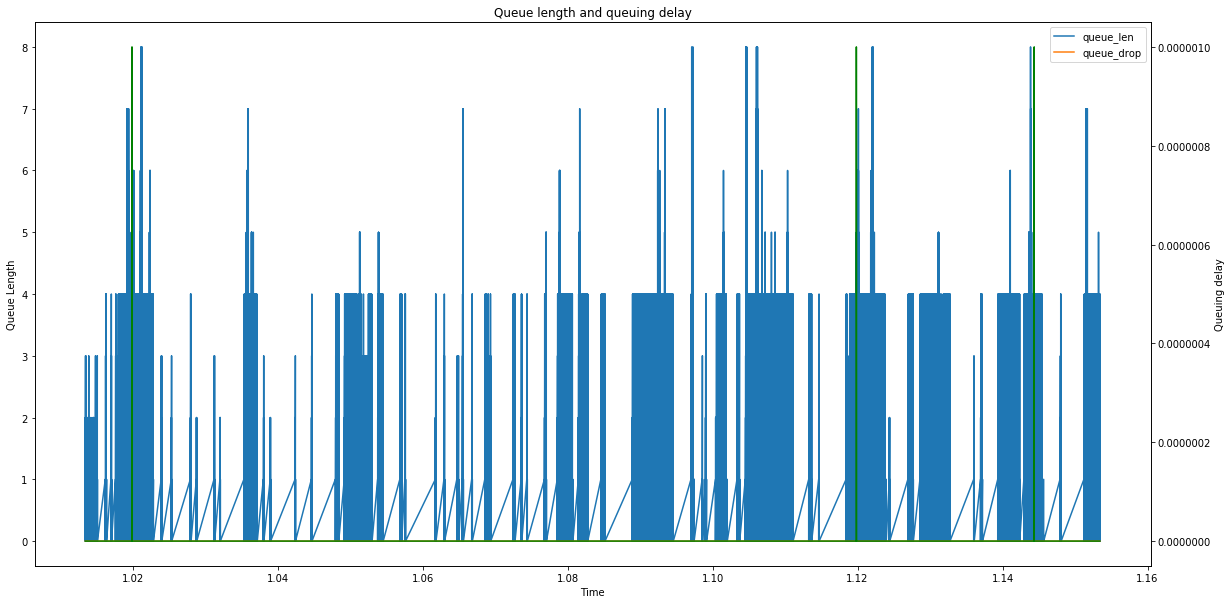

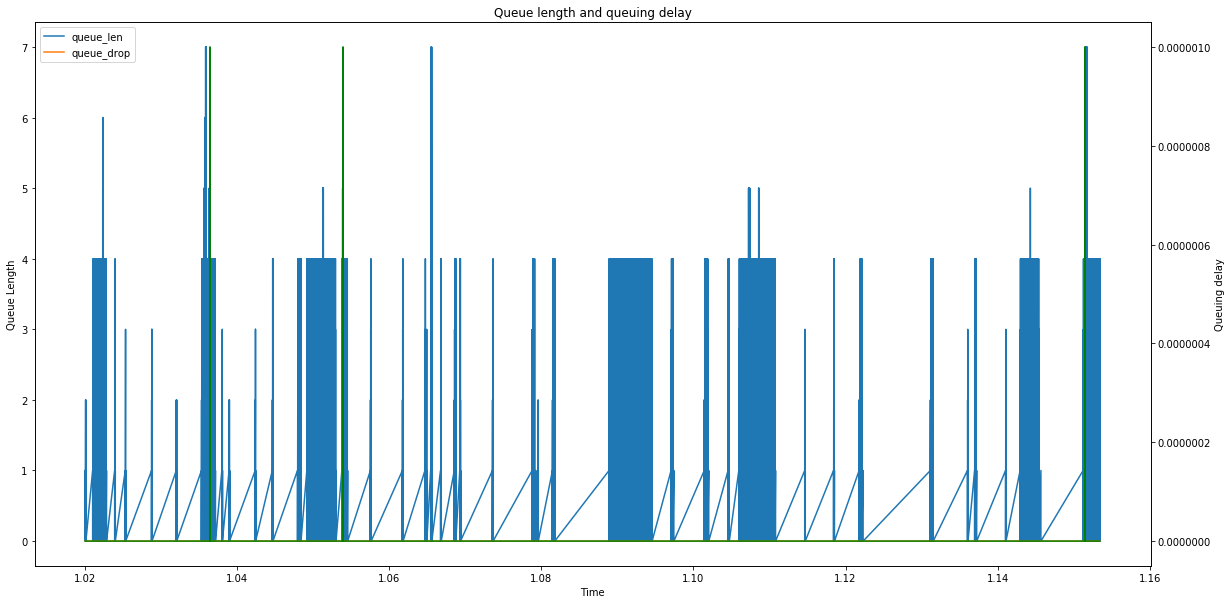

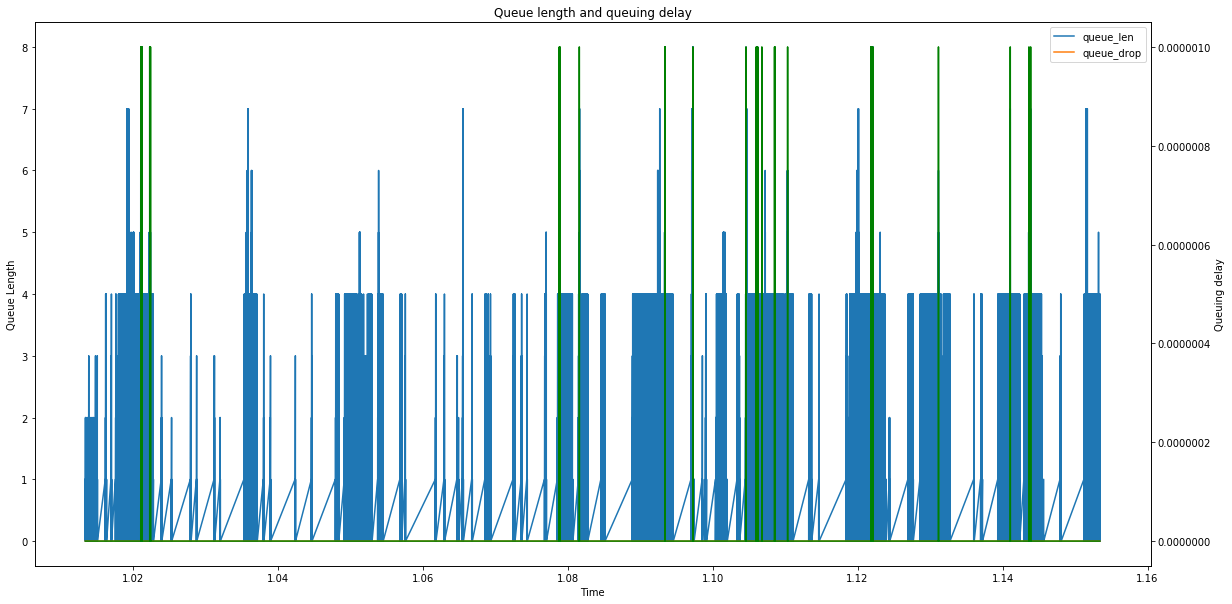

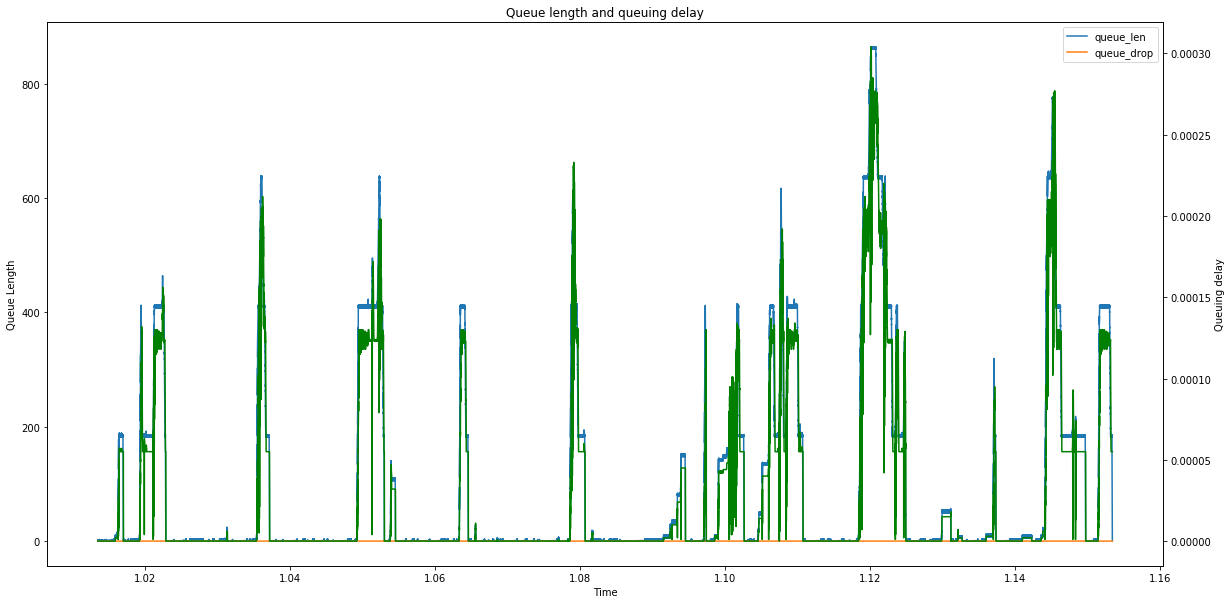

In [14]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "HRCCPL_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")
plot_short_th(df_out_tr_6, 12, 83)
plot_flow_path_queue_length(df_out_tr_6, 180)

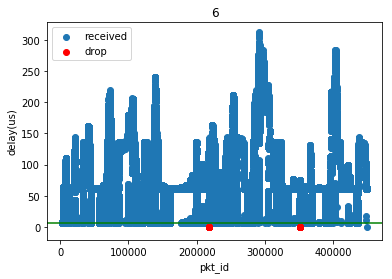

In [15]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                        "HRCCPL_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

### AFQ10PL

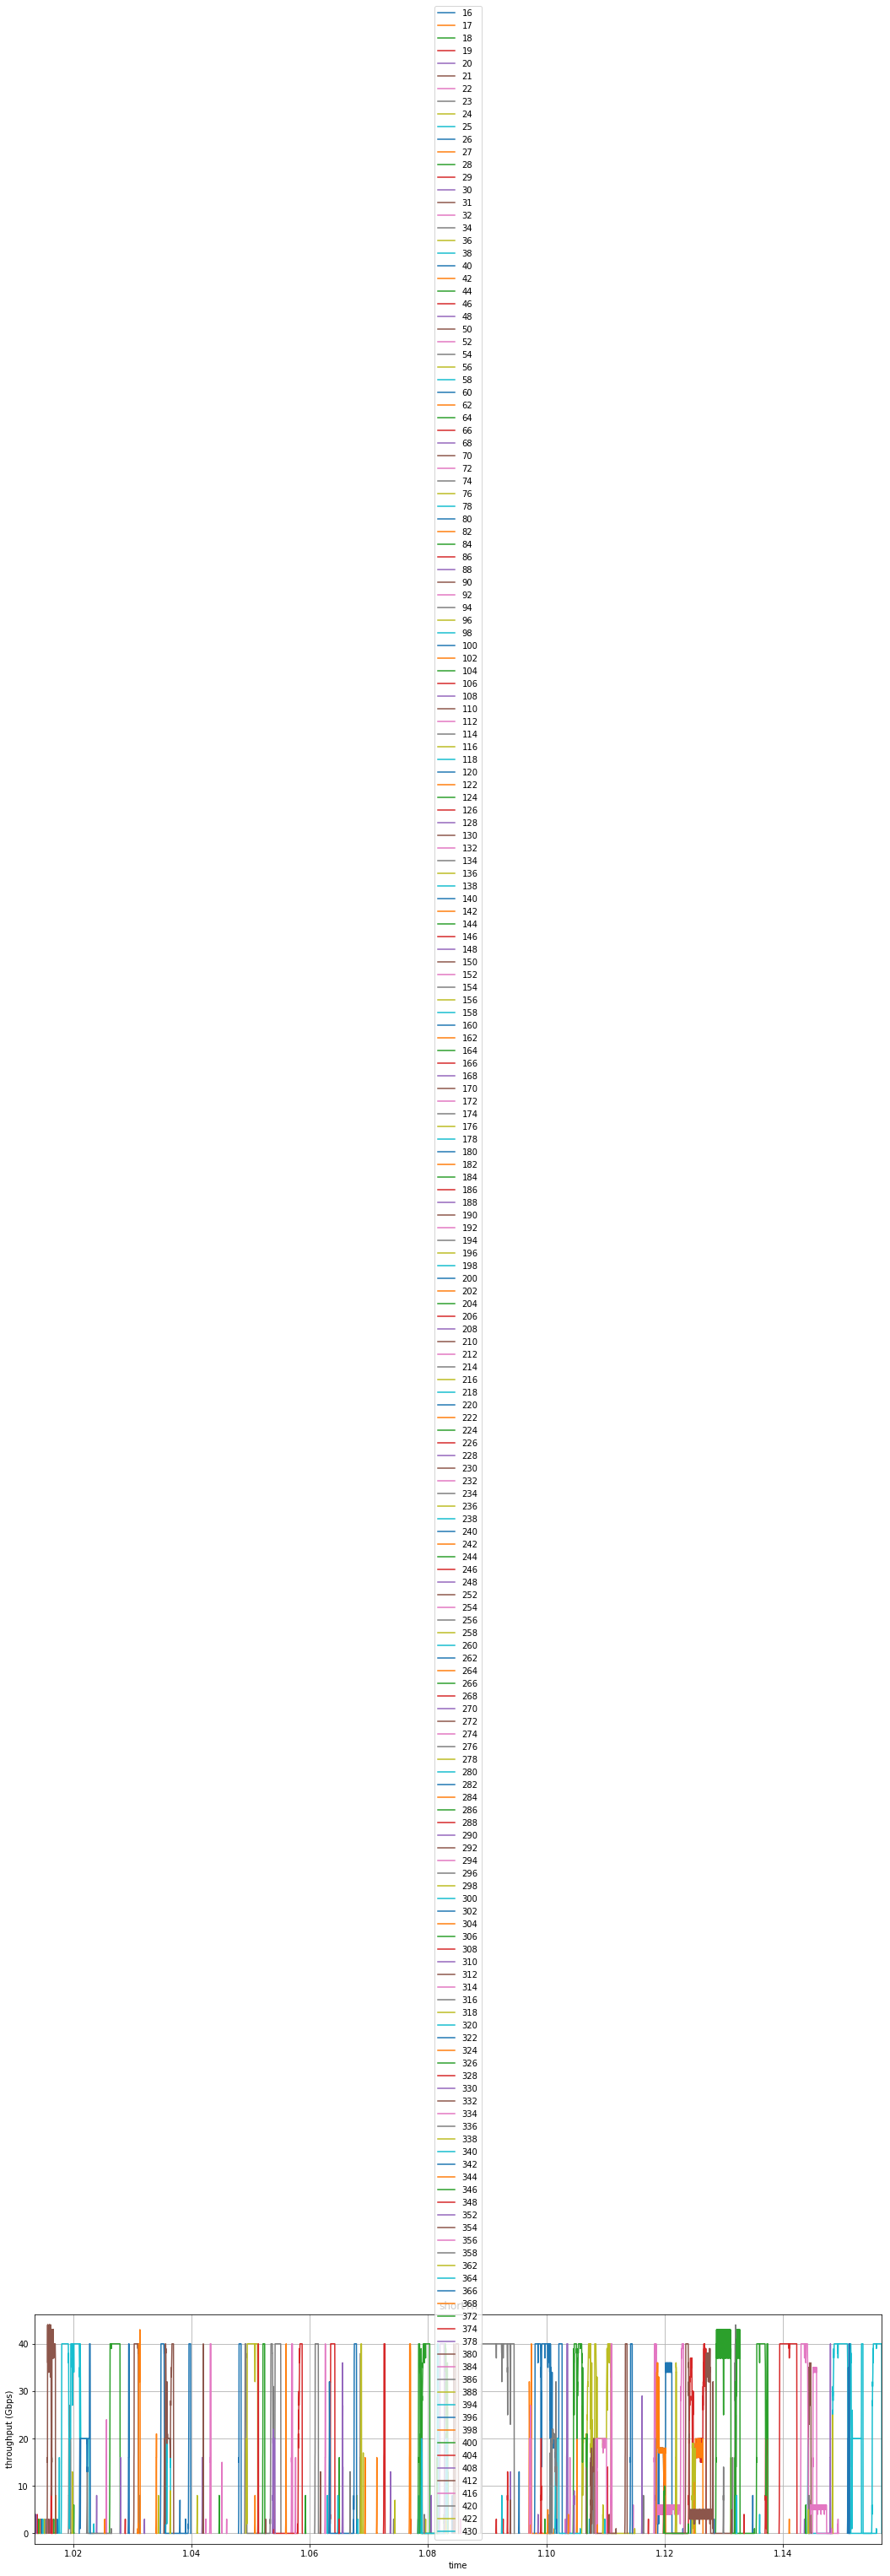

from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


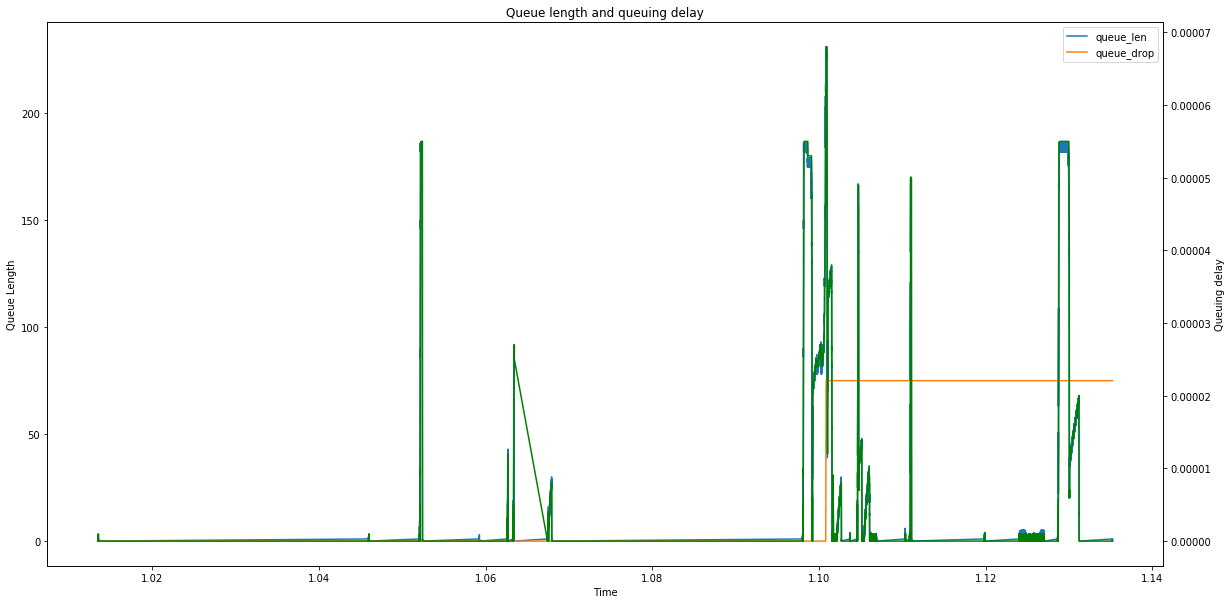

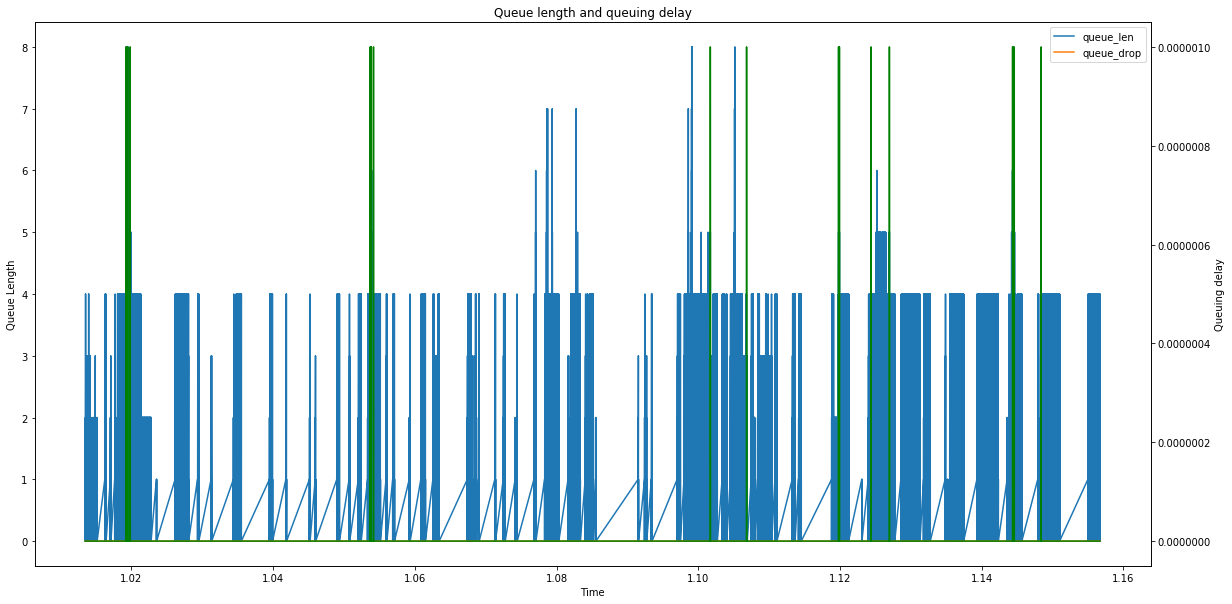

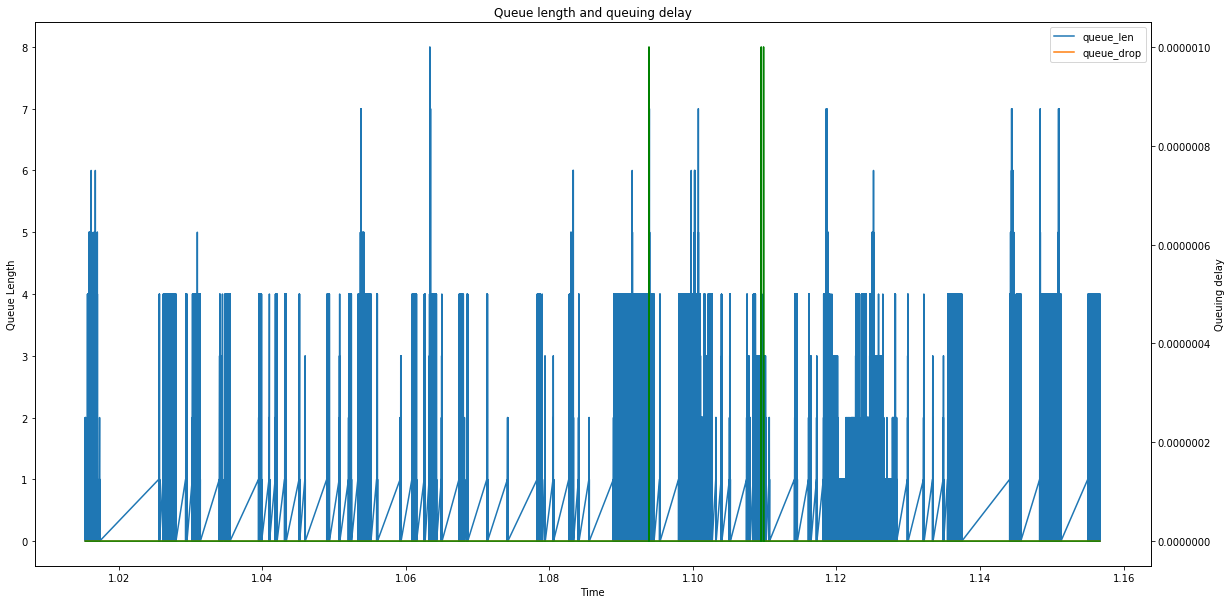

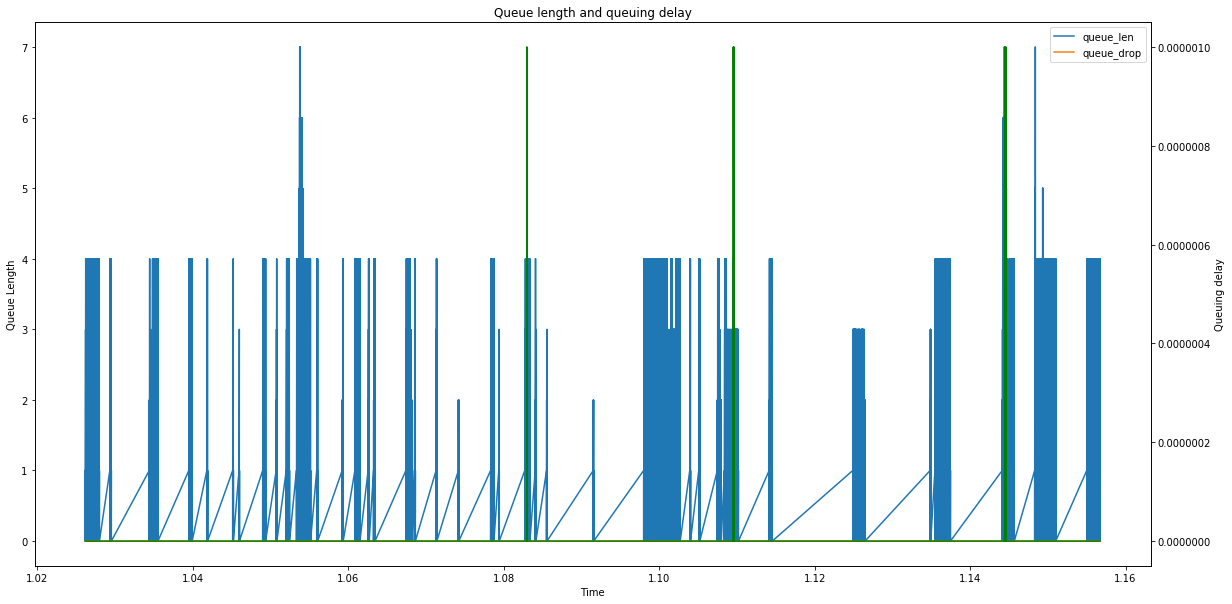

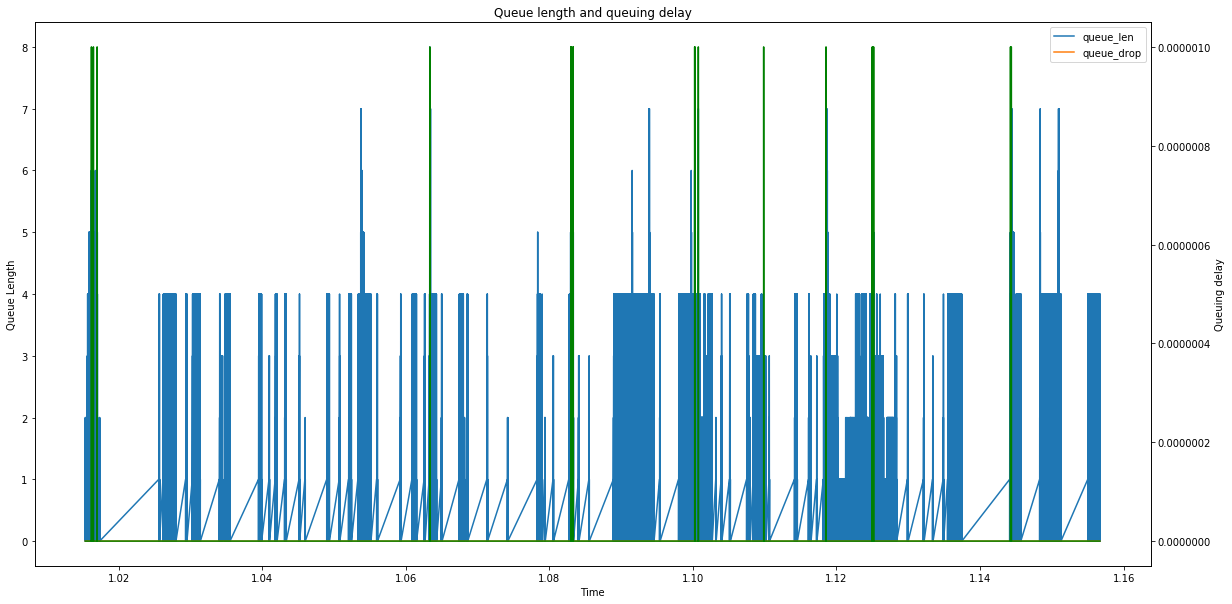

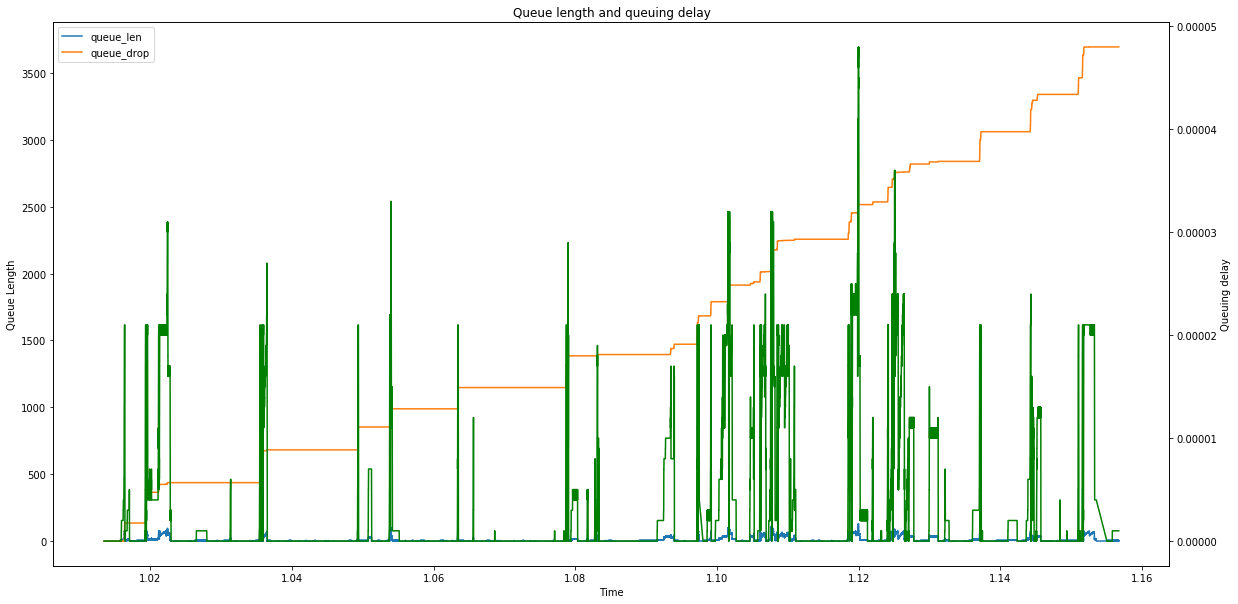

In [16]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                              "AFQ10PL_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")
plot_short_th(df_out_tr_6, 12, 83)
plot_flow_path_queue_length(df_out_tr_6, 180)

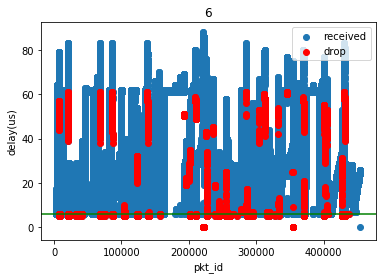

In [17]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/", \
                        "AFQ10PL_flow_200_0.8_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')